In [52]:
import numpy as np
from numpy import sqrt, sin
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import math
from numpy import exp
from scipy import linalg
from scipy.sparse import diags

%matplotlib inline

In [53]:
# imaginary unit in numpy = 1j
pi = np.pi

# consts
x0 = 0
x1 = 1
N = 100
x = np.linspace(x0, x1, N)
dx = abs(x0-x1)/(N-1)
dt = 0.0001
t0 = 0
t = 100000 #loops of simulation

#parametry f. falowe
n = 1
κ = 1
ω = 3 * pi**2 / 2
#inicjalizacja
ψ_r = sqrt(2)*sin(n*pi*x)
ψ_r[0] = ψ_r[N-1] = 0 
ψ_i = np.zeros_like(ψ_r)
ψ_i[0] = ψ_i[N-1] = 0
#hamiltonian
def set_H(psi, τ):
    H = np.zeros_like(psi)
    #outside boundary conditions(0)
    for i  in range(1, N-1):
        H[i] = -.5* (psi[i+1] - 2*psi[i] + psi[i-1])/(dx**2) + ( κ*( x[i] - .5) * psi[i] * sin(ω * τ) )
        # print(i)
    return H
H_r = set_H(ψ_r, t0)
H_i = set_H(ψ_i, t0)

In [54]:
def simulation(ψ_r, ψ_i, τ):
    #steps of simulation
    ψ_r2 = ψ_r + set_H(ψ_i, τ)*dt/2   #(32)
    ψ_i = ψ_i - set_H(ψ_r2, τ)*dt    #(33)
    ψ_r = ψ_r2 + set_H(ψ_i, τ)*dt/2    #(34)
    #boundary
    ψ_r[0] = ψ_r[N-1] = 0 
    ψ_i[0] = ψ_i[N-1] = 0
    H_r = set_H(ψ_r, τ)
    H_i = set_H(ψ_i, τ)
    return ψ_r, ψ_i, H_r, H_i

In [55]:
E = []
T = []
'''simulation'''
for i in range(t):
    τ = dt * i
    ψ_r, ψ_i, H_r, H_i = simulation(ψ_r, ψ_i, τ)
    # print(ψ_r)
    if i%1 == 0 : #reszta z dzielenia 0, !0 = 1 
        # print(ψ_i)
        ϵ = dx*np.sum(ψ_r**2 + ψ_i**2)
        E.append(ϵ)
        T.append(τ)
        # print('norma: {:.2f}'.format(ϵ))
        # print('energia: {:.2f}'.format( dx*np.sum(ψ_r*H_r + ψ_i*H_i)))

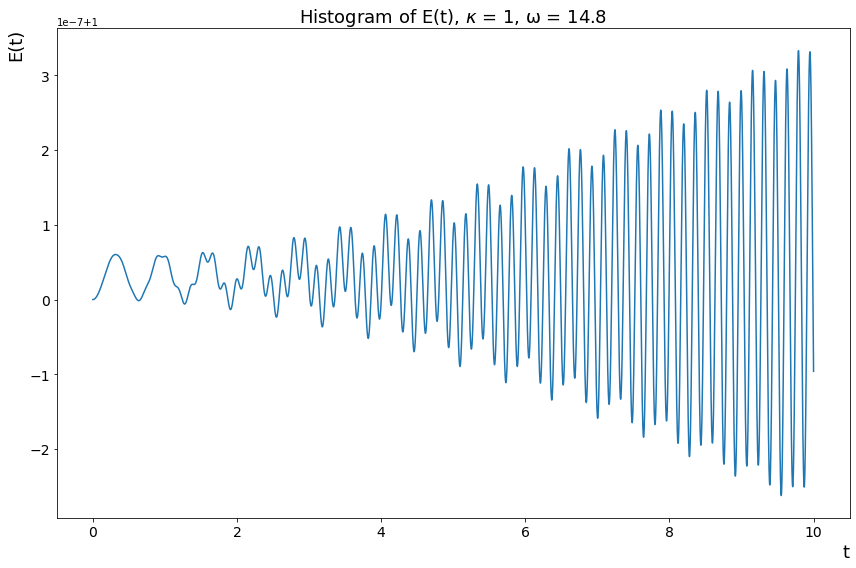

In [56]:
# if not os.path.exists(directory+'wykresy'):
    # os.makedirs(directory+'/wykresy')
def histogram(var, time, name, info, ticks = 0):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.title(r'Histogram of ' + name + ', '+ info, fontsize=18)
    plt.xlabel('t', fontsize=18, loc='right')
    plt.ylabel(name, fontsize=18, loc='top')
    if (ticks == 1):
        plt.yticks(np.arange(min(var), max(var)+1, step=.01))
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        ax.get_yaxis().get_major_formatter().set_useOffset(False)
    #plt.yscale('log')
    plt.plot(time, var)
    ax.tick_params(axis='both', which='major', labelsize=14)
    # plt.yticks(np.arange(min(var), max(var), step=0.01))
    fig.tight_layout()
    # plt.savefig(directory+'/wykresy/' + name + '_' + info + '.png')
    plt.show()   
info = '$κ$ = ' + str(κ) + ', ω = ' + str(round(ω, 2))              
histogram(E, T, 'Ε(t)', info, 0)
